# Why is Machine Learning difficult?

### Learning Objectives:

1. Know the difference between a training set and test set.
2. Be able to understand the relationship between training and test errors and how they depend on the size of the model, the number of training examples, and the number of training iterations.

# The Gaussian (Normal) Distribution

- The Gaussian distribution is also called the normal distribution.
- Let's say that x is a real valued random variable and if the probability distribution of X is gaussian with mean $\mu$ and variance $\sigma^2$, then we have the following:
    - $x = N(\mu, \sigma^2)$

The Gaussian is parameterized by two parameters being the mean and variance. If we were to plot a gaussian distribution or the gaussian probability density, it will look like a bell-shaped curve.

In [156]:
#imports
from scipy.stats import norm
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from matplotlib import pyplot as plt, rcParams

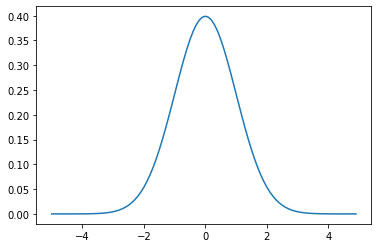

In [157]:
mean = 0
standard_deviation = 1

x_values = np.arange(-5, 5, 0.1)
y_values = norm(mean, standard_deviation)

plt.plot(x_values, y_values.pdf(x_values)) 

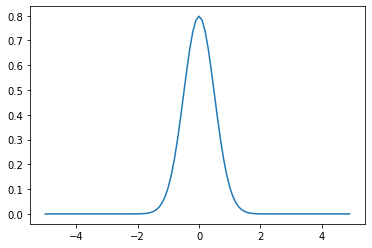

In [158]:
mean = 0
standard_deviation = 0.5

y_values = norm(mean, standard_deviation)
plt.plot(x_values, y_values.pdf(x_values))

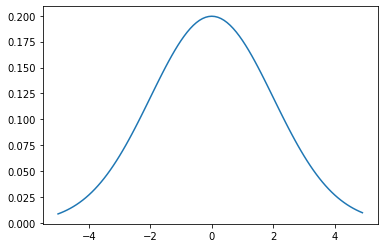

In [159]:
mean = 0
standard_deviation = 2

y_values = norm(mean, standard_deviation)
plt.plot(x_values, y_values.pdf(x_values))

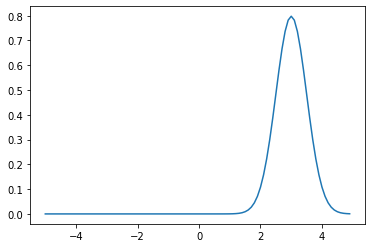

In [160]:
mean = 3
standard_deviation = 0.5

y_values = norm(mean, standard_deviation)
plt.plot(x_values, y_values.pdf(x_values))

This bell-shaped curve is parameterized by those differences ($\mu \text{ and } \sigma$). The center is the mean $\mu$ , and the width of the bell-shaped curve is $\sigma$ or standard deviation.

This specifies  the probability of X taking on different values, here x is taking on values mainly in the middle, since the gaussian density here is pretty high. X is also diminishing in probability as it takes on values further away from the mean.

The probability of X is parametrized by the two parameters $\mu$ and $\sigma^2$, and the formula for the Gaussian density is the following:

$P(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$

This is the formula for the bell-shaped curve. The bell-shaped curve is actually the figure we get when we take a fixed value of $\mu \text{ and } \sigma$ , and we plot P(x;$\mu,\sigma^2$).

## Parameter Estimation Problem

Let's say we have a dataset of M examples and let's say each of these examples is a real number.

Dataset: $x^{(1)},x^{(2)},..., x^{(m)}, x^{i} \in R$

 The parameter estimation problem is, let's say that we suspect that these examples came from a gaussian distribution/normal distribution, with some parameter $\mu \text{ and } \sigma^2$. The problem with parameter estimation is, given my dataset I want to figure out or estimate what are the values of $\mu \text{ and } \sigma^2$. 

We are able to estimate these values using the following equations:

$\mu = \frac{1}{M} \sum_{i=1}^{M}x^{(i)}$

 
$\sigma^2 = \frac{1}{M} \sum_{i=1}^{M} (x^{(i)} - \mu)^2$

One interpretation of the variance is, when you look at the term being squared it is the squared difference between the value and the mean of the distribution. The variance is going to estimate the average of these squared differences.

To learn the parameters X , we will train our models on a training data set and then test the effectiveness of the model on a different dataset, the test data set. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.

---

We will use polynomial regression to build a model and make predictions on new and existing data.

## Polynomial Regression

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_h X^h$ 

- h is the degree of the polynomial (h=1 linear, h=2 quadratic, h=3 cubic, ...)
- Although this model allows for a nonlinear relationship between X and Y, polynomial regression is still considered linear regression since it is linear in the regression coefficients.

**Task 1**

For $f(x) = 2x, N_{\text{train}}=10, \text{ and } \sigma=0$, train three classes of models (linear, third-order, and tenth-order)

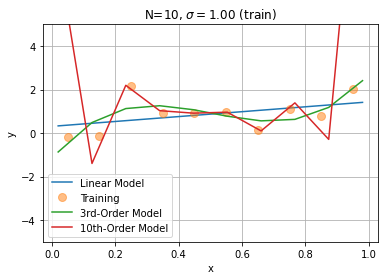

In [161]:
#task 1 - fitting and predicting
# The Training Data
N_train = 10
sigma_train=1
# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#case 1
y=2*x+s

#linear model
#creating linear model
lm = linear_model.LinearRegression()
#training linear model on training set
lm.fit(x[:, np.newaxis], y)
# grid of points, some are in the training set, some are not
#----------------------------------------------------
xplot=np.linspace(0.02,0.98,N_train)
#----------------------------------------------------
#create figure with training data and predicted values
linear_plot=plt.plot(xplot, lm.predict(xplot[:, np.newaxis]), label='Linear Model')
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
linear_err = mean_squared_error(y, lm.predict(xplot[:, np.newaxis]))

#third-order model
#create polynomial regression model
poly3 = PolynomialFeatures(degree=3)
#construct polynomial coefficients
X = poly3.fit_transform(x[:,np.newaxis])
#create linear model
lm3 = linear_model.LinearRegression()
#fit linear model to coefficients and values 
lm3.fit(X,y)
#create figure with training data and predicted values
Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, lm3.predict(Xplot), label='3rd-Order Model')
thirdo_err = mean_squared_error(y, lm3.predict(Xplot))

#tenth-order model 
#create polynomial regression model
poly10 = PolynomialFeatures(degree=10)
#construct polynomial coefficients
X = poly10.fit_transform(x[:,np.newaxis])
#create linear model
lm10 = linear_model.LinearRegression()
#fit linear model to coefficients and values 
lm10.fit(X,y)
#create figure with training data and predicted values
Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, lm10.predict(Xplot), label='10th-Order Model')
tentho_err = mean_squared_error(y, lm10.predict(Xplot))

#graphing
plt.legend(loc='best')
plt.ylim([-5,5])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

In [162]:
print(
        "Training Error",
        "\nLinear Error: ", linear_err, 
        "\nThird-Order Error: ", thirdo_err, 
        "\nTenth-Order Error: ", tentho_err
     )

Training Error 
Linear Error:  0.47237984611238815 
Third-Order Error:  0.2860547511000172 
Tenth-Order Error:  27.142953284786223


## Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?

A good model is the one which has good prediction accuracy; in other words, which has the smallest prediction error. When we train a machine learning model, we don’t just want it to learn to model the training data. We want it to generalize to data it hasn’t seen before. Fortunately, there’s a very convenient way to measure an algorithm’s generalization performance: we measure its performance on a held-out test set, consisting of examples it hasn’t seen before. If an algorithm works well on the training set but fails to generalize, we say it is overfitting.

**Task 2**

Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example x∈[0,1.2] ) using the code below. How well do you do on points in the range of x where you trained the model? How about points outside the original training data set?

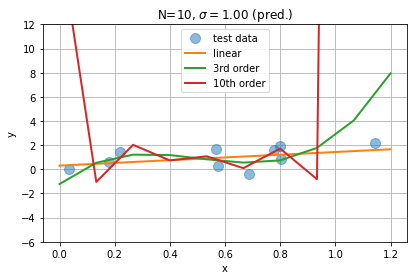

In [163]:
#task 2 - testing models
# Number of test data
N_test=10
sigma_test=sigma_train

max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

#case 1
y_test=2*x_test+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, N_test)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,lm.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
linear_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))

p3=plt.plot(x_plot,lm3.predict(X3), lw=2, label='3rd order')
thirdo_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))

p10=plt.plot(x_plot,lm10.predict(X10), lw=2, label='10th order')
tentho_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))
plt.grid()
plt.show()

In [164]:
print(
        "Testing Error",
        "\nLinear Error: ", linear_err, 
        "\nThird-Order Error: ", thirdo_err, 
        "\nTenth-Order Error: ", tentho_err
     )

Testing Error 
Linear Error:  1.1485020213747923 
Third-Order Error:  1.1485020213747923 
Tenth-Order Error:  1.1485020213747923


**Task 3**

Now consider the class when $f(x) = 2x-10x^5 +15x^{10}$

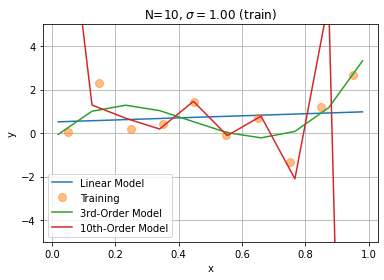

In [165]:
#task 3
# The Training Data
N_train = 10
sigma_train=1
# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

y=2*x - 10*x**5 + 15*x**10 + s

#linear model
#creating linear model
lm = linear_model.LinearRegression()
#training linear model on training set
lm.fit(x[:, np.newaxis], y)
# grid of points, some are in the training set, some are not
#----------------------------------------------------
xplot=np.linspace(0.02,0.98,N_train)
#----------------------------------------------------
#create figure with training data and predicted values
linear_plot=plt.plot(xplot, lm.predict(xplot[:, np.newaxis]), label='Linear Model')
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
linear_err = mean_squared_error(y, lm.predict(xplot[:, np.newaxis]))

#third-order model
#create polynomial regression model
poly3 = PolynomialFeatures(degree=3)
#construct polynomial coefficients
X = poly3.fit_transform(x[:,np.newaxis])
#create linear model
lm3 = linear_model.LinearRegression()
#fit linear model to coefficients and values 
lm3.fit(X,y)
#create figure with training data and predicted values
Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, lm3.predict(Xplot), label='3rd-Order Model')
thirdo_err = mean_squared_error(y, lm3.predict(Xplot))

#tenth-order model 
#create polynomial regression model
poly10 = PolynomialFeatures(degree=10)
#construct polynomial coefficients
X = poly10.fit_transform(x[:,np.newaxis])
#create linear model
lm10 = linear_model.LinearRegression()
#fit linear model to coefficients and values 
lm10.fit(X,y)
#create figure with training data and predicted values
Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, lm10.predict(Xplot), label='10th-Order Model')
tentho_err = mean_squared_error(y, lm10.predict(Xplot))

#graphing
plt.legend(loc='best')
plt.ylim([-5,5])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

In [166]:
print(
        "Training Error",
        "\nLinear Error: ", linear_err, 
        "\nThird-Order Error: ", thirdo_err, 
        "\nTenth-Order Error: ", tentho_err
     )

Training Error 
Linear Error:  1.2495364461898564 
Third-Order Error:  0.7356967864851596 
Tenth-Order Error:  355.55144604957286


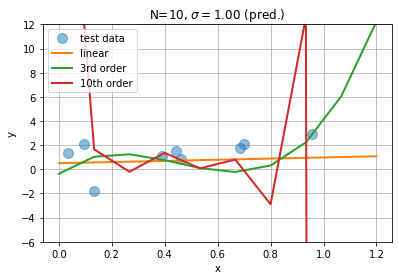

In [167]:
# Number of test data
N_test=10
sigma_test=sigma_train

max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)


#case 2
y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, N_test)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,lm.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
linear_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))


p3=plt.plot(x_plot,lm3.predict(X3), lw=2, label='3rd order')
thirdo_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))

p10=plt.plot(x_plot,lm10.predict(X10), lw=2, label='10th order')
tentho_err = mean_squared_error(y_test, lm.predict(xplot[:, np.newaxis]))

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))
plt.grid()
plt.show()

In [168]:
print(
        "Testing Error",
        "\nLinear Error: ", linear_err, 
        "\nThird-Order Error: ", thirdo_err, 
        "\nTenth-Order Error: ", tentho_err
     )



Testing Error 
Linear Error:  255.62772797959778 
Third-Order Error:  255.62772797959778 
Tenth-Order Error:  255.62772797959778


---

1. Do better fits lead to better predictions?
2. What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points?
3. Summarize what you think you learned about the relationship of knowing the true model class and predictive power.

### Bias-Variance Trade-off

The problem of Bias-Variance Trade-off is at the core of creating a good predictive model.

When the outcome of quantitative (as opposed to qualitative), the most common method for characterizing a model's predictive capacbilities is to use the root mean squared error (RMSE). This metric is a function of the model residuals, which are the observed values minus the model predictions. The mean squared error (MSE) is calculated by squaring the residuals and summing them. The value is usually interpreted as either how far (on average) the residuals are from zero or as the average distance between the observed values and the model predictions.

If we assume that the data points are statistically independent and that the residuals have a theoretical mean of zero and a constant variance, then 

$\text{MSE} = \sigma^2 + (\text{Model Bias})^2 + \text{ Model Variance}$

- $\sigma^2$is the irreducible error and cannot be eliminated by modeling. This is the variance within the data set.
- The squared bias of the model reflects how close the functional form of the model is to the true relationship between the predictors and the outcome. If the true functional form in the population is parabolic and a linear model is used, then the model is a biased model. It is part of system error in the model.
- The model variance quantifies the dependency of a model on the data points, that are used to create the model. If a change in a small portion of the data results in a substantial change in the estimates of the model parameters, then the model is said to have high variance.

The best model is the one which can balance the bias and the variance of a model.

A biased model typically has low variance. An extreme example is when a polynomial regression model is estimated by a constant value equal to a the sample median. The straight line will have no impact if a handful of observations are changed. However, a bias of this model is excessively high and naturally, it is not a good model to consider. 

On the other extreme, suppose a model is constructed where the regression line is made to go through all data points, or through as many of them as possible. This model will have very high variance, as even if a single observed values is changed, the model changes. Thus it is possible that when intentional bias is introduced in a regression model, the prediction error becomes smaller, compared to an unbiased regression model. 

While a simple model has a high bias, model complexity causes model variance to increase. An ideal predictor is that, which will learn all the structure in the data but none of the noise. While with increasing model complexity in the training data, the prediction error reduces monotonically, the same will not be true for test data. Bias and variance move in opposing directions and at a suitable bias-variance combination the prediction error is the minimum in the test data. The model that achieves this lowest possible prediction error is the best prediction model.  

![](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/lesson04/model_complexity.png)


### References

---

[Lecture 15.2 - Anomaly Detection | Gaussian Distribution - [ Machine Learning | Andrew Ng ]](https://www.youtube.com/watch?v=mh6rAYA0e7Q&t=10s)

[Lecture 9: Generalization Notes](https://www.cs.toronto.edu/~lczhang/321/notes/notes09.pdf)

[7.7 - Polynomial Regression](https://online.stat.psu.edu/stat462/node/158/)

[NB1_CII-ML_is_difficult](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB1_CII-ML_is_difficult.html)